In [ ]:
import pandas as pd

df = pd.read_csv('patient info .csv')
df.head()


,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated


In [ ]:
df.shape


(4212, 14)

In [ ]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4212 entries, 0 to 4211
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   id                4212 non-null   int64  
 1   sex               318 non-null    object 
 2   birth_year        292 non-null    float64
 3   country           4212 non-null   object 
 4   region            305 non-null    object 
 5   group             76 non-null     object 
 6   infection_reason  130 non-null    object 
 7   infection_order   35 non-null     float64
 8   infected_by       62 non-null     float64
 9   contact_number    32 non-null     float64
 10  confirmed_date    4212 non-null   object 
 11  released_date     28 non-null     object 
 12  deceased_date     13 non-null     object 
 13  state             4212 non-null   object 
dtypes: float64(4), int64(1), object(9)
memory usage: 460.8+ KB


In [ ]:
df = df.drop(columns=[
    'group',
    'infected_by',
    'contact_number',
    'infection_order',
    'deceased_date'
], errors='ignore')
df['birth_year'] = df['birth_year'].fillna(df['birth_year'].median())
df['sex'] = df['sex'].fillna('Unknown')
df['confirmed_date'] = pd.to_datetime(df['confirmed_date'])
df['released_date'] = pd.to_datetime(df['released_date'], errors='coerce')
df.isnull().sum()


,0
id,0
sex,0
birth_year,0
country,0
region,3907
infection_reason,4082
confirmed_date,0
released_date,4184
state,0


In [ ]:
df = df.drop(columns=['region', 'infection_reason', 'released_date'])


In [ ]:
df.isnull().sum()


,0
id,0
sex,0
birth_year,0
country,0
confirmed_date,0
state,0


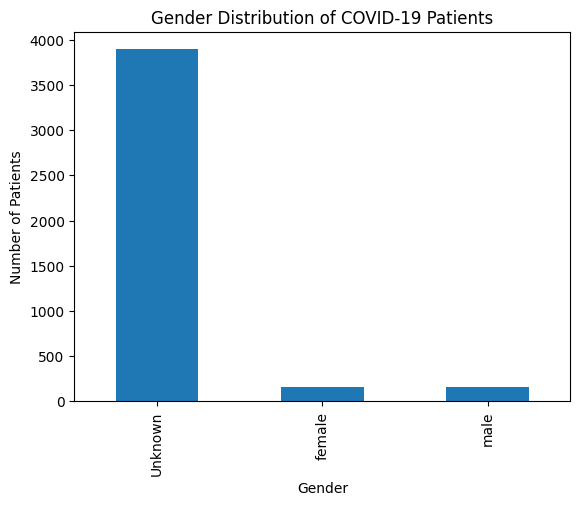

In [ ]:
import matplotlib.pyplot as plt

df['sex'].value_counts().plot(kind='bar')
plt.title('Gender Distribution of COVID-19 Patients')
plt.xlabel('Gender')
plt.ylabel('Number of Patients')
plt.show()


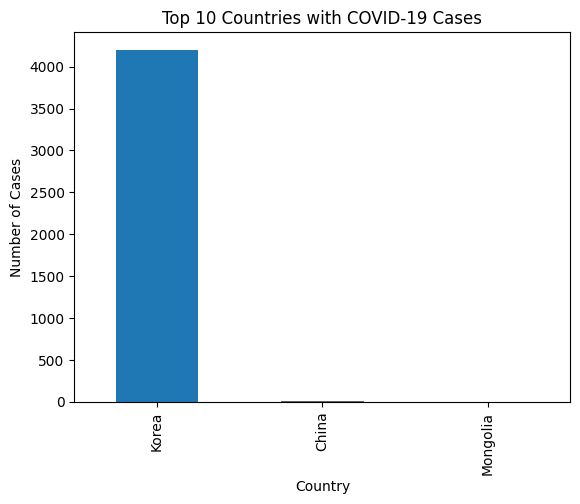

In [ ]:
df['country'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 Countries with COVID-19 Cases')
plt.xlabel('Country')
plt.ylabel('Number of Cases')
plt.show()


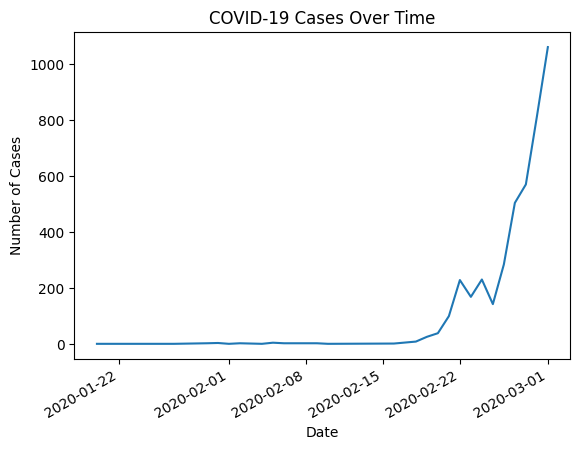

In [ ]:
df.groupby('confirmed_date').size().plot()
plt.title('COVID-19 Cases Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Cases')
plt.show()


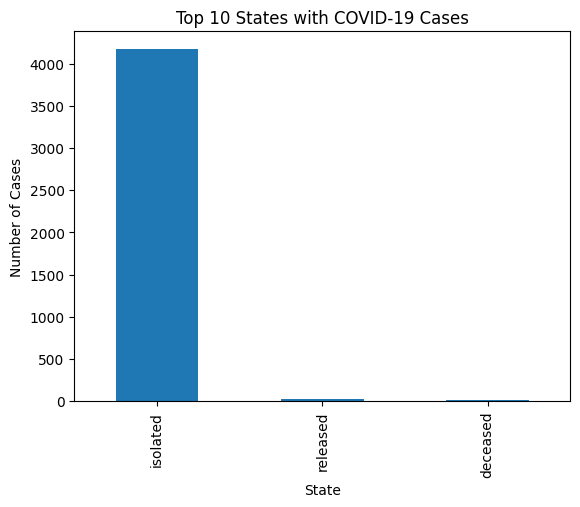

In [ ]:
df['state'].value_counts().head(10).plot(kind='bar')
plt.title('Top 10 States with COVID-19 Cases')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.show()


In [ ]:
import pandas as pd
df_full = pd.read_csv('patient info .csv')

# Convert dates
df_full['confirmed_date'] = pd.to_datetime(df_full['confirmed_date'])
df_full['released_date'] = pd.to_datetime(df_full['released_date'], errors='coerce')

# Calculate recovery days
df_full['recovery_days'] = (df_full['released_date'] - df_full['confirmed_date']).dt.days

# Check first 5 rows
df_full[['confirmed_date','released_date','recovery_days']].head()


,confirmed_date,released_date,recovery_days
0,2020-01-20,2020-02-06,17.0
1,2020-01-24,2020-02-05,12.0
2,2020-01-26,2020-02-12,17.0
3,2020-01-27,2020-02-09,13.0
4,2020-01-30,NaT,NaN


In [ ]:
# Summary statistics for recovery days
df_full['recovery_days'].describe()


,recovery_days
count,28.000000
mean,15.107143
std,5.626256
min,7.000000
25%,9.750000
50%,16.000000
75%,19.250000
max,24.000000


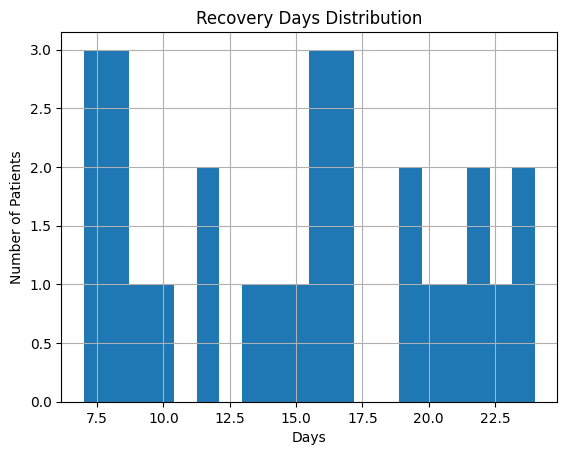

In [ ]:
import matplotlib.pyplot as plt

# Histogram of recovery days
df_full['recovery_days'].hist(bins=20)
plt.title('Recovery Days Distribution')
plt.xlabel('Days')
plt.ylabel('Number of Patients')
plt.show()


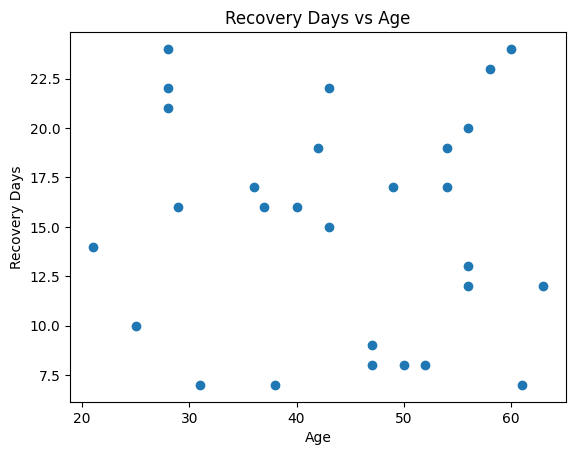

In [ ]:
# Scatter plot of age vs recovery days
df_full['age'] = 2020 - df_full['birth_year']  # calculate age if not done
plt.scatter(df_full['age'], df_full['recovery_days'])
plt.title('Recovery Days vs Age')
plt.xlabel('Age')
plt.ylabel('Recovery Days')
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: make plots look nicer
sns.set(style="whitegrid")


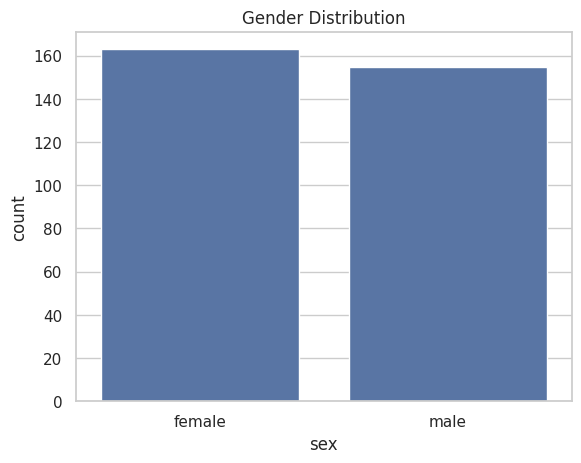

In [ ]:
sns.countplot(x='sex', data=df_full)
plt.title('Gender Distribution')
plt.show()


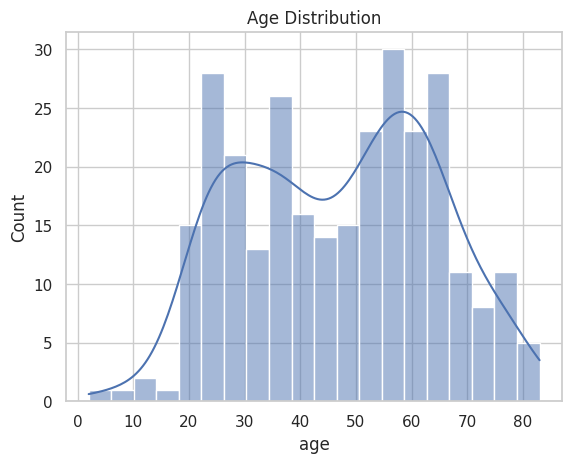

In [ ]:
sns.histplot(df_full['age'], bins=20, kde=True); plt.title('Age Distribution'); plt.show()

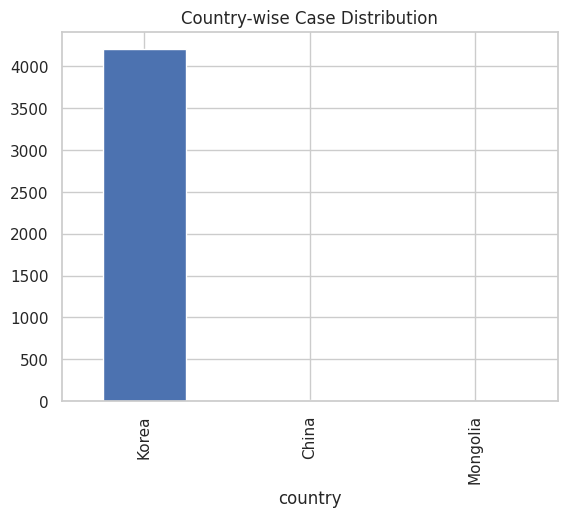

In [ ]:
df_full['country'].value_counts().plot(kind='bar'); plt.title('Country-wise Case Distribution'); plt.show()

In [ ]:
df_full['state_name'].value_counts().plot(kind='bar'); plt.title('State-wise Case Distribution'); plt.show()

KeyError: 'state_name'

In [ ]:
df_full.columns


Index(['id', 'sex', 'birth_year', 'country', 'region', 'group',
       'infection_reason', 'infection_order', 'infected_by', 'contact_number',
       'confirmed_date', 'released_date', 'deceased_date', 'state',
       'recovery_days', 'age'],
      dtype='object')

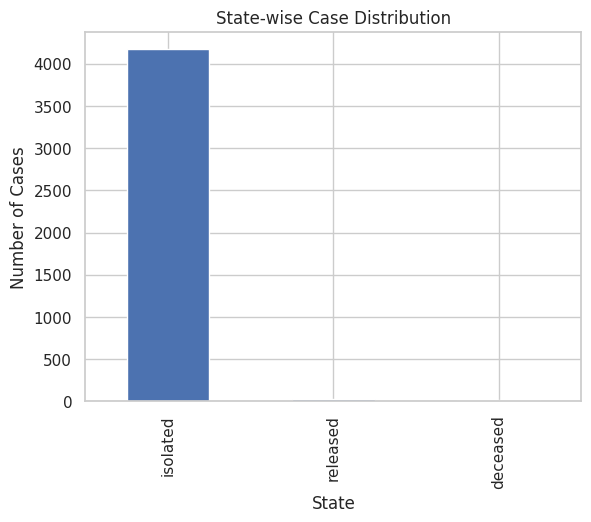

In [ ]:
df_full['state'].value_counts().plot(kind='bar')
plt.title('State-wise Case Distribution')
plt.xlabel('State')
plt.ylabel('Number of Cases')
plt.show()


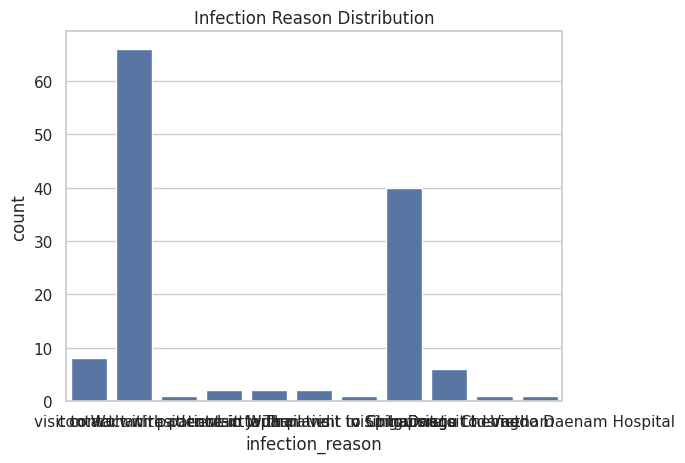

In [ ]:
sns.countplot(x='infection_reason', data=df_full); plt.title('Infection Reason Distribution'); plt.show()

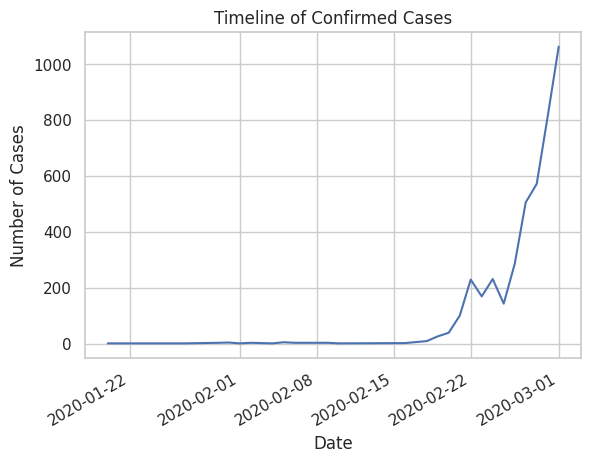

In [ ]:
df_full['confirmed_date'].value_counts().sort_index().plot(); plt.title('Timeline of Confirmed Cases'); plt.xlabel('Date'); plt.ylabel('Number of Cases'); plt.show()

In [ ]:
df_full['recovery_days'].hist(bins=20); plt.title('Recovery Days Distribution'); plt.xlabel('Days'); plt.ylabel('Number of Patients'); plt.show()

NameError: name 'df_full' is not defined

In [ ]:
globals().keys()


dict_keys(['__name__', '__doc__', '__package__', '__loader__', '__spec__', '__builtin__', '__builtins__', '_ih', '_oh', '_dh', 'In', 'Out', 'get_ipython', 'exit', 'quit', '_', '__', '___', '_i', '_ii', '_iii', '_i1', '_i2'])

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [ ]:
df_full = pd.read_csv('patient.csv')



In [ ]:
df_full.head()


,id,sex,birth_year,country,region,group,infection_reason,infection_order,infected_by,contact_number,confirmed_date,released_date,deceased_date,state
0,1,female,1984.0,China,filtered at airport,NaN,visit to Wuhan,1.0,NaN,45.0,2020-01-20,2020-02-06,NaN,released
1,2,male,1964.0,Korea,filtered at airport,NaN,visit to Wuhan,1.0,NaN,75.0,2020-01-24,2020-02-05,NaN,released
2,3,male,1966.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,16.0,2020-01-26,2020-02-12,NaN,released
3,4,male,1964.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,95.0,2020-01-27,2020-02-09,NaN,released
4,5,male,1987.0,Korea,capital area,NaN,visit to Wuhan,1.0,NaN,31.0,2020-01-30,NaN,NaN,isolated


In [ ]:
df_full['age'] = 2020 - df_full['birth_year']


In [ ]:
df_full['confirmed_date'] = pd.to_datetime(df_full['confirmed_date'])
df_full['released_date'] = pd.to_datetime(df_full['released_date'], errors='coerce')


In [ ]:
df_full['recovery_days'] = (
    df_full['released_date'] - df_full['confirmed_date']
).dt.days


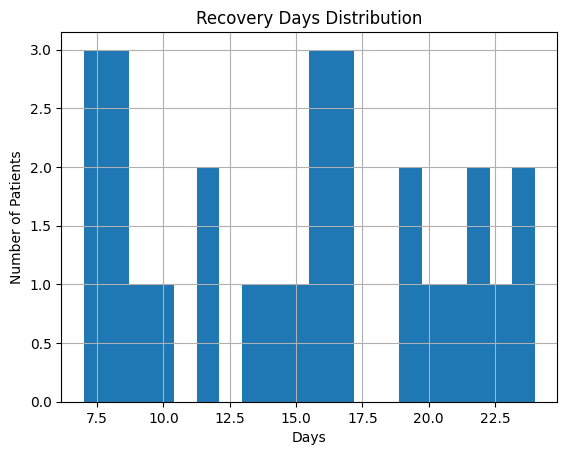

In [ ]:
df_full['recovery_days'].hist(bins=20)
plt.title('Recovery Days Distribution')
plt.xlabel('Days')
plt.ylabel('Number of Patients')
plt.show()


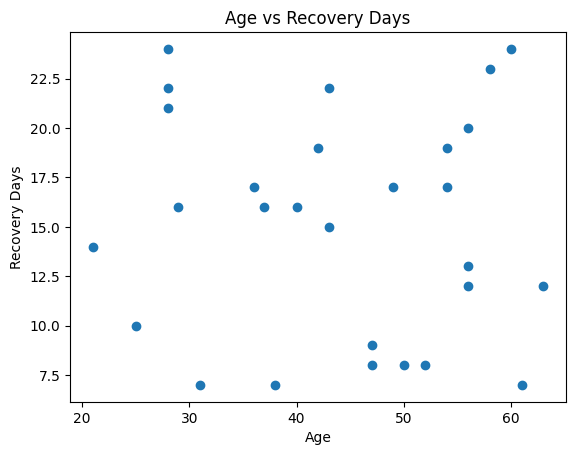

In [ ]:
plt.scatter(df_full['age'], df_full['recovery_days']); plt.title('Age vs Recovery Days'); plt.xlabel('Age'); plt.ylabel('Recovery Days'); plt.show()

In [ ]:
df_full['recovery_days'].describe()


,recovery_days
count,28.000000
mean,15.107143
std,5.626256
min,7.000000
25%,9.750000
50%,16.000000
75%,19.250000
max,24.000000


In [ ]:
df_full[['age', 'contact_number', 'infection_order', 'recovery_days']].corr()


,age,contact_number,infection_order,recovery_days
age,1.000000,0.173970,0.517028,-0.076391
contact_number,0.173970,1.000000,-0.096180,-0.244144
infection_order,0.517028,-0.096180,1.000000,0.018192
recovery_days,-0.076391,-0.244144,0.018192,1.000000


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score


In [ ]:
X = df_full[['age', 'contact_number', 'infection_order']]
y = df_full['recovery_days']

X = X.fillna(0)
y = y.fillna(0)


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred = model.predict(X_test)
r2_score(y_test, y_pred)


-0.35508316245338833

In [ ]:
# Recovery Days statistics
recovery_stats = df_full['recovery_days'].describe()
print("Recovery Days Statistics:\n", recovery_stats)


Recovery Days Statistics:
 count    28.000000
mean     15.107143
std       5.626256
min       7.000000
25%       9.750000
50%      16.000000
75%      19.250000
max      24.000000
Name: recovery_days, dtype: float64


In [ ]:
# Correlation between features and recovery days
corr_table = df_full[['age','contact_number','infection_order','recovery_days']].corr()
print("Correlation Table:\n", corr_table)


Correlation Table:
                       age  contact_number  infection_order  recovery_days
age              1.000000        0.173970         0.517028      -0.076391
contact_number   0.173970        1.000000        -0.096180      -0.244144
infection_order  0.517028       -0.096180         1.000000       0.018192
recovery_days   -0.076391       -0.244144         0.018192       1.000000


In [ ]:
from sklearn.metrics import r2_score
y_pred = model.predict(X_test)
print("Linear Regression R²:", r2_score(y_test, y_pred))

Linear Regression R²: -0.35508316245338833
